In [83]:
using Pkg
# Pkg.add("Flux")
Pkg.add(Pkg.PackageSpec(;name="Flux", version="0.9.0"))
Pkg.add("BSON")
Pkg.add("ImagenView")
Pkg.add("Plots")
Pkg.add("ImageIO")
Pkg.add("ImageMagick")
Pkg.add("Tracker")
Pkg.add("Images")
Pkg.add("FileIO")

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


LoadError: The following package names could not be resolved:
 * ImagenView (not found in project, manifest or registry)


In [84]:
; pwd

/home/arteck/Documents/P/maestria/tareas/1_semestre/Programación Avanzada/PCIC-PA-2021-1/Proyecto/CNN


In [85]:
; git clone https://github.com/INVASIS/Viola-Jones

fatal: destination path 'Viola-Jones' already exists and is not an empty directory.


In [86]:
; ls

CNN_orden_aleatorio.ipynb
CNN_sin_ordenar.ipynb
Viola-Jones


In [87]:
using Flux, Flux.Data.MNIST, Statistics
using Flux: onehotbatch, onecold, crossentropy, throttle
using Base.Iterators: repeated, partition
using Printf, BSON
using ImageView
using Plots
using Tracker
##Use 
using Images, FileIO




In [88]:
@time begin
    files_faces_train = readdir("Viola-Jones/data/trainset/faces/")
    images_train = Array{Array{Gray{Normed{UInt8,8}},2},1}()
    for file in files_faces_train
        img_path = "Viola-Jones/data/trainset/faces/" * file
        img_temp = load(img_path)
        push!(images_train, img_temp)    
    end
end
y_train=ones(size(files_faces_train))
@time begin
    files_no_faces_train = readdir("Viola-Jones/data/trainset/non-faces/")
    for file in files_no_faces_train
        img_path = "Viola-Jones/data/trainset/non-faces/" * file
        img_temp = load(img_path)
        push!(images_train, img_temp)    
    end
end
y_train = vcat(y_train, zeros(size(files_no_faces_train)))

  0.254945 seconds (677.21 k allocations: 38.637 MiB)
  0.842338 seconds (2.38 M allocations: 136.374 MiB)


10977-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [89]:
@time begin
    files_faces_test = readdir("Viola-Jones/data/testset/faces/")
    images_test = Array{Array{Gray{Normed{UInt8,8}},2},1}()
    for file in files_faces_test
        img_path = "Viola-Jones/data/testset/faces/" * file
        img_temp = load(img_path)
        push!(images_test, img_temp)    
    end
end
y_test=ones(size(files_faces_test))
@time begin
    files_no_faces_test = readdir("Viola-Jones/data/testset/non-faces/")
    for file in files_no_faces_test
        img_path = "Viola-Jones/data/testset/non-faces/" * file
        img_temp = load(img_path)
        push!(images_test, img_temp)    
    end
end
y_test = vcat(y_test, zeros(size(files_no_faces_test)))

  0.049331 seconds (131.24 k allocations: 7.495 MiB)
  1.911980 seconds (5.46 M allocations: 311.798 MiB)


20044-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [90]:
readdir("Viola-Jones/data/trainset/")

2-element Array{String,1}:
 "faces"
 "non-faces"

In [91]:
size(y_train)

(10977,)

In [92]:
y_train = reshape(y_train, 1, size(y_train)[1])


1×10977 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [93]:


# Load labels and images from Flux.Data.MNIST
# Train set: images used to estimate the CNN
# Load data on gpu (if enabled)
train_labels = gpu.(y_train)
train_imgs = gpu.(images_train);


In [94]:

# Test set: images used to see how well the CNN perform "out-of-the-sample"
test_imgs = images_test
test_labels = y_test

20044-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [95]:

print("Images in the train set: $(size(train_imgs))")
print("Images in the test set: $(size(test_imgs))")


Images in the train set: (10977,)Images in the test set: (20044,)

In [96]:
size(train_imgs[1])

(19, 19)

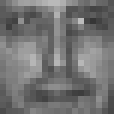

In [97]:

# Visualization of one digit
NROWS, NCOLS = 19, 19
a = reshape(train_imgs[1], NROWS, NCOLS)

In [98]:
288 / 32

9.0

In [99]:
28 / 4

7.0

In [100]:
train

LoadError: UndefVarError: train not defined

In [101]:
3 * 3 * 32 

288

In [102]:
?reshape

search: reshape promote_shape



```
reshape(A, dims...) -> AbstractArray
reshape(A, dims) -> AbstractArray
```

Return an array with the same data as `A`, but with different dimension sizes or number of dimensions. The two arrays share the same underlying data, so that the result is mutable if and only if `A` is mutable, and setting elements of one alters the values of the other.

The new dimensions may be specified either as a list of arguments or as a shape tuple. At most one dimension may be specified with a `:`, in which case its length is computed such that its product with all the specified dimensions is equal to the length of the original array `A`. The total number of elements must not change.

# Examples

```jldoctest
julia> A = Vector(1:16)
16-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15
 16

julia> reshape(A, (4, 4))
4×4 Array{Int64,2}:
 1  5   9  13
 2  6  10  14
 3  7  11  15
 4  8  12  16

julia> reshape(A, 2, :)
2×8 Array{Int64,2}:
 1  3  5  7   9  11  13  15
 2  4  6  8  10  12  14  16

julia> reshape(1:6, 2, 3)
2×3 reshape(::UnitRange{Int64}, 2, 3) with eltype Int64:
 1  3  5
 2  4  6
```


In [103]:
model = Chain(
    # First convolution, operating upon a 28x28 image
    Conv((3, 3), 1=>16, pad=(2,2), relu),
    MaxPool((2,2)), #maxpooling

    # Second convolution, operating upon a 14x14 image
    Conv((3, 3), 16=>32, pad=(1,1), relu),
    MaxPool((2,2)), #maxpooling

    # Third convolution, operating upon a 7x7 image
#     Conv((3, 3), 32=>32,pad=(1,1), relu),
#     MaxPool((2,2)),

#     # Reshape 3d tensor into a 2d one, at this point it should be (3, 3, 32, N)
#     # which is where we get the 288 in the `Dense` layer below:
# #     x -> reshape(x, :, size(x, 4)),
    x -> reshape(x, :, size(x, 4)),
    
    Dense(800, 2),
#     Dense(128, 128),
    

    # Softmax to get probabilities
    softmax,
)

# Load on gpu (if available)
model = gpu(model);

In [104]:
# Batching 
# See: https://github.com/FluxML/model-zoo/blob/master/vision/mnist/conv.jl
# Bundle images together with labels and group into minibatchess
function make_minibatch(X, Y, idxs)
    X_batch = Array{Float32}(undef, size(X[1])..., 1, length(idxs))
    for i in 1:length(idxs)
        X_batch[:, :, :, i] = Float32.(X[idxs[i]])
    end
    Y_batch = onehotbatch(Y[idxs], 0:1)
#     Y_batch = Y[idxs]
    return (X_batch, Y_batch)
end
# The CNN only "sees" 128 images at each training cycle:
batch_size = 128
mb_idxs = partition(1:length(train_imgs), batch_size)
# train set in the form of batches
train_set = [make_minibatch(train_imgs, train_labels, i) for i in mb_idxs];
# train set in one-go: used to calculate accuracy with the train set
train_set_full = make_minibatch(train_imgs, train_labels, 1:length(train_imgs));
# test set: to check we do not overfit the train data:
test_set = make_minibatch(test_imgs, test_labels, 1:length(test_imgs));

In [105]:
size(train_set)

(86,)

In [106]:
train_set[1][2]

2×128 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1

In [107]:
length(train_set[1])

2

In [108]:
# Loss function
# See: https://github.com/FluxML/model-zoo/blob/master/vision/mnist/conv.jl
# `loss()` calculates the crossentropy loss between our prediction `y_hat`
function loss(x, y)
    # Add some noise to the image
    # we reduce the risk of overfitting the train sample by doing so:
    x_aug = x .+ 0.1f0*gpu(randn(eltype(x), size(x)))

    y_hat = model(x_aug)
    return crossentropy(y_hat, y)
end
accuracy(x, y) = mean(onecold(model(x)) .== onecold(y))

# ADAM optimizer
opt = ADAM(0.001);

In [109]:
train_set[1][1]

19×19×1×128 Array{Float32,4}:
[:, :, 1, 1] =
 0.407843  0.478431  0.556863  0.623529  …  0.407843  0.396078  0.329412
 0.352941  0.4       0.454902  0.470588     0.278431  0.305882  0.356863
 0.356863  0.352941  0.317647  0.4          0.313726  0.356863  0.309804
 0.333333  0.286275  0.258824  0.564706     0.258824  0.313726  0.34902
 0.380392  0.247059  0.345098  0.392157     0.298039  0.278431  0.360784
 0.388235  0.368627  0.333333  0.376471  …  0.392157  0.372549  0.372549
 0.505882  0.411765  0.447059  0.490196     0.509804  0.403922  0.403922
 0.564706  0.454902  0.521569  0.572549     0.52549   0.443137  0.47451
 0.529412  0.580392  0.537255  0.615686     0.607843  0.521569  0.501961
 0.505882  0.52549   0.572549  0.623529     0.592157  0.529412  0.501961
 0.470588  0.537255  0.529412  0.568627  …  0.560784  0.501961  0.458824
 0.454902  0.501961  0.517647  0.537255     0.529412  0.505882  0.466667
 0.478431  0.509804  0.505882  0.560784     0.545098  0.517647  0.466667
 0.43137

In [110]:
# Training loop
# See: https://github.com/FluxML/model-zoo/blob/master/vision/mnist/conv.jl
best_acc = 0.0
last_improvement = 0
accuracy_target = 0.97 #Set an accuracy target. When reached, we stop training.
max_epochs = 100 #Maximum
for epoch_idx in 1:100
    global best_acc, last_improvement
    # Train for a single epoch
    Flux.train!(loss, params(model), train_set, opt)

    # Calculate accuracy:
    acc = accuracy(train_set_full...)
    @info(@sprintf("[%d]: Train accuracy: %.4f", epoch_idx, acc))
    
    # Calculate accuracy:
    acc = accuracy(test_set...)
    @info(@sprintf("[%d]: Test accuracy: %.4f", epoch_idx, acc))

    # If our accuracy is good enough, quit out.
    if acc >= accuracy_target
        @info(" -> Early-exiting: We reached our target accuracy of $(accuracy_target*100)%")
        break
    end

    if epoch_idx - last_improvement >= 10
        @warn(" -> We're calling this converged.")
        break
    end
end

┌ Info: [1]: Train accuracy: 0.7787
└ @ Main In[110]:14
┌ Info: [1]: Test accuracy: 0.9765
└ @ Main In[110]:18
┌ Info:  -> Early-exiting: We reached our target accuracy of 97.0%
└ @ Main In[110]:22


In [111]:
# Get predictions and convert data to Array: 
pred = Tracker.data(model(test_set[1])); 

# Function to get the row index of the max value: 
f1(x) = getindex.(argmax(x, dims=1), 1) # Final predicted value is the one with the maximum probability: 
pred = f1(pred) .- 1; #minus 1, because the first digit is 0 (not 1)

# pred

In [112]:
(y_test .== transpose(pred)
    

LoadError: syntax: incomplete: premature end of input

In [117]:
true_positives = sum((y_test .== transpose(pred)) .& (y_test .== 1))
true_negatives = sum((y_test .== transpose(pred)) .& (y_test .== 0))
false_positives = sum((y_test .!= transpose(pred)) .& (y_test .== 1))
false_negatives = sum((y_test .!= transpose(pred)) .& (y_test .== 0))

0

In [123]:
acurracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

NaN

In [124]:
acurracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

NaN

In [125]:
print("La exactitud del modelo fue: $(acurracy)\n")
print("La precisión del modelo fue: $(precision)\n")
print("El recall del modelo fue: $(recall)\n")

La exactitud del modelo fue: 0.9764518060267412
La precisión del modelo fue: 0.0
El recall del modelo fue: NaN
